# Daily bike rental

## Basic overlook at the data


In [86]:
# loading libraies and data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [87]:
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [88]:
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)
print(bike_data_raw.info())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB
None


## Rentals - Target

The rental variable is our target value, and descriptive statistics have been computed for it. Upon examining the median, mean, and histogram, we observe a distribution skewed to the right.

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64


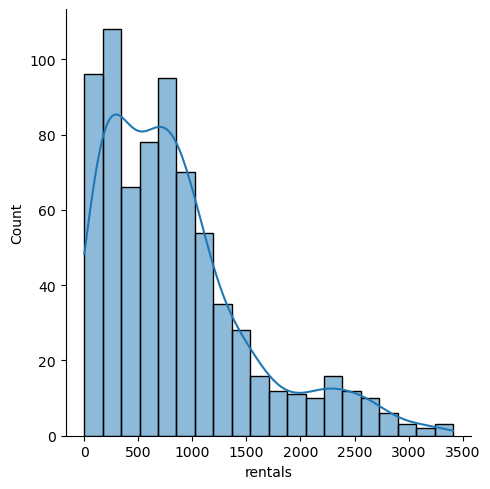

In [89]:
print(bike_data_raw['rentals'].describe())
sns.displot(data = bike_data_raw, x='rentals', kde=True)

Over time representation of the number of rentals, with the addition of a 30-day moving average overlaying the plot.

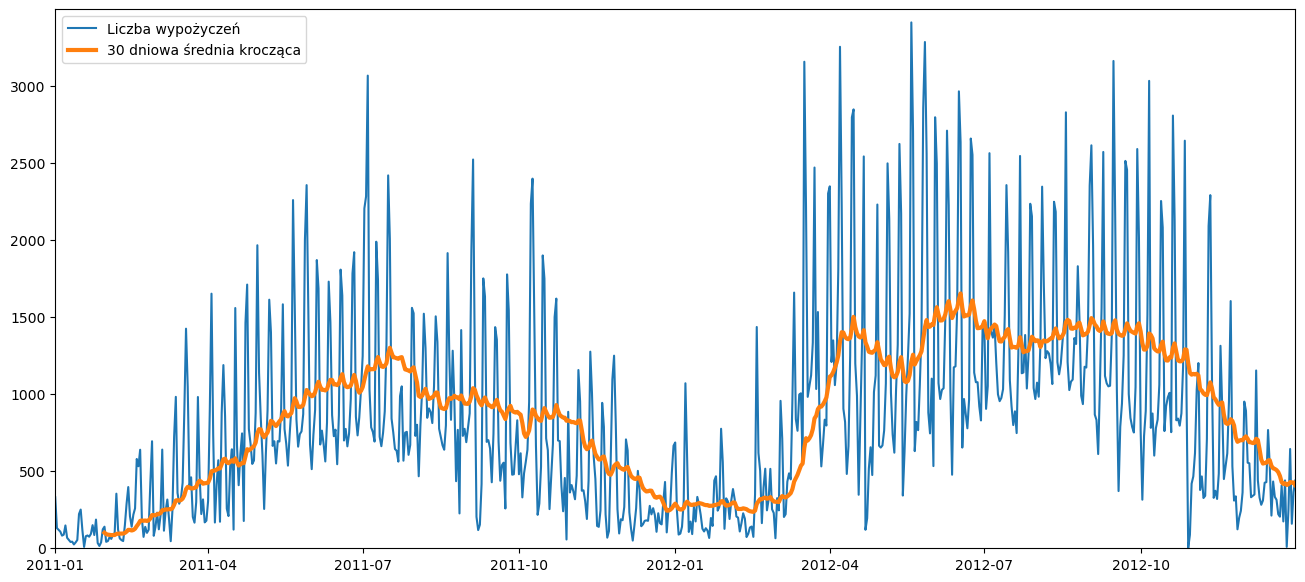

In [90]:
plt.figure(figsize=(16, 7))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='Liczba wypożyczeń')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3.0, label='30 dniowa średnia krocząca')
plt.xlim([bike_data_raw['dteday'].min(), bike_data_raw['dteday'].max()])
plt.ylim([0, bike_data_raw['rentals'].max()*1.025])
plt.legend(loc='upper left')
plt.show()

## Features 



In [91]:
print('Before removing:')
display(bike_data_raw)
print('After removing repeated/unused features:')
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

Before removing:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


After removing repeated/unused features:


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


All features were separated into numerical and categorical groups.

In [92]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

### Numeric features

Scatter plots showing the relationship between the target variable and continuous features.

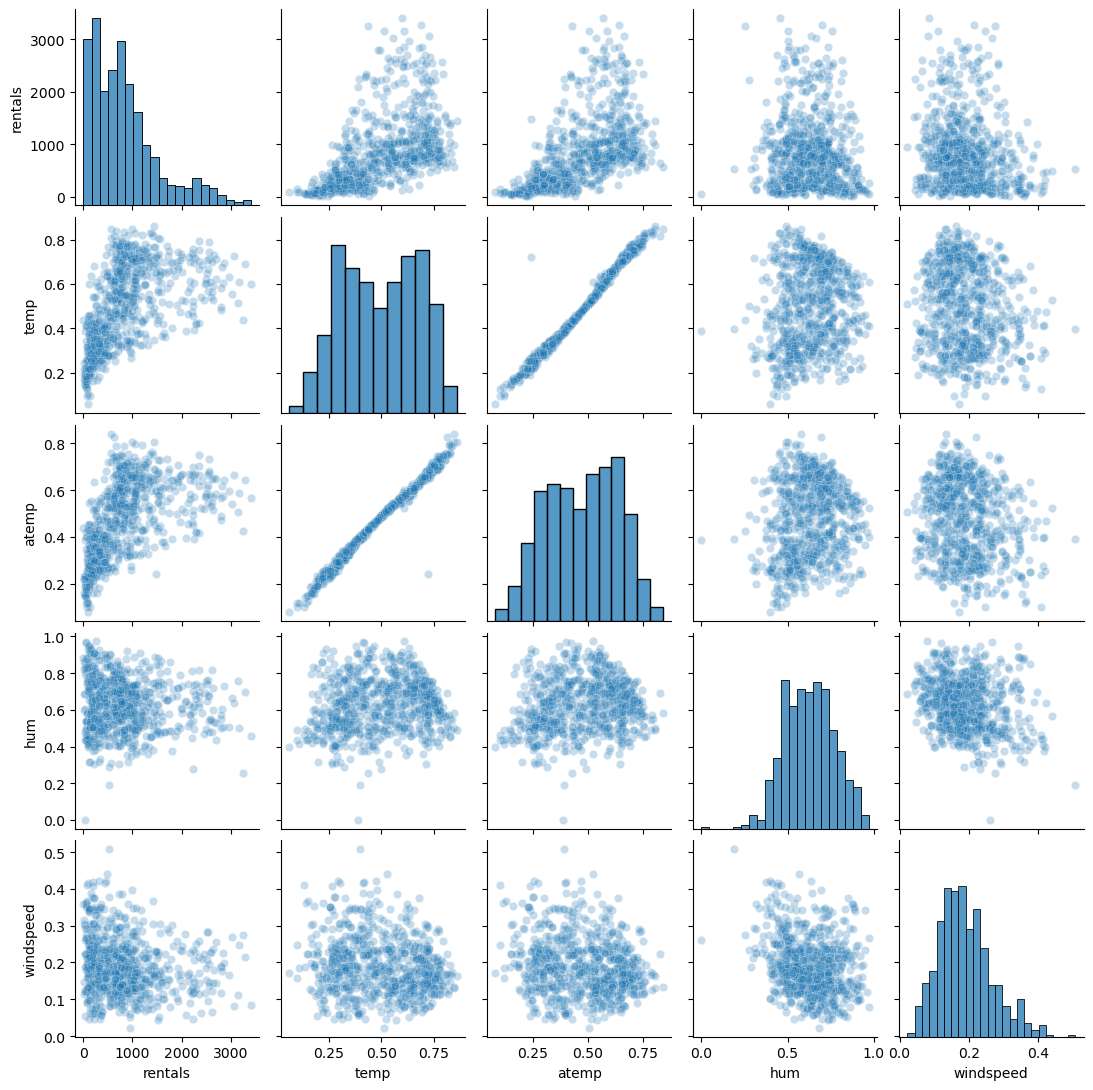

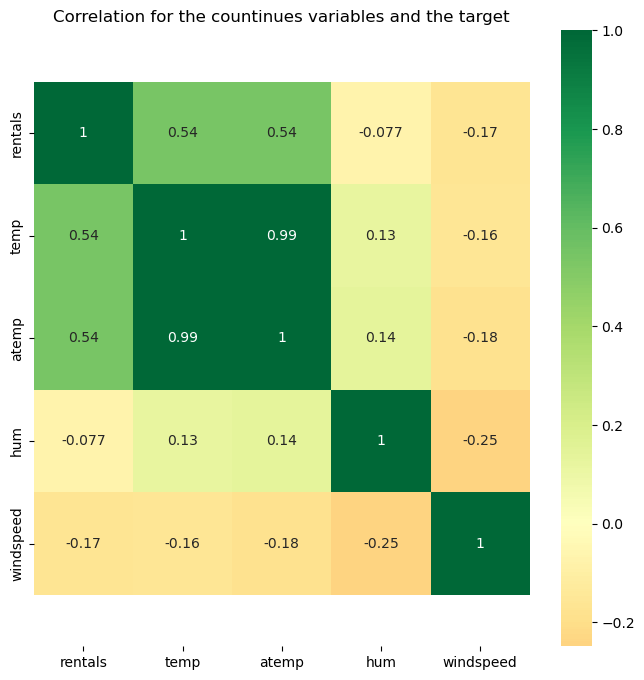

In [93]:
fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(11, 11) #ustawiamy rozmiar wykresu
plt.show()

plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Correlation for the countinues variables and the target', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The heatmap correlation indicates that rentals exhibit a positive correlation with both temperature (temp) and 'feels like' temperature (atemp). However, these two temperature measures are closely correlated with each other. Conversely, humidity and wind speed show a small negative relationship with the target variable.

As 'temp' and 'atemp' contain redundant information, their combination will be presented to enhance their impact on the target values. Below, the new correlation for temperature and the temperature difference (difference_temp) has been calculated.

In [94]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


### Categorical features

Violin plots have been generated for all categorical features to examine their relationship with the target variable.

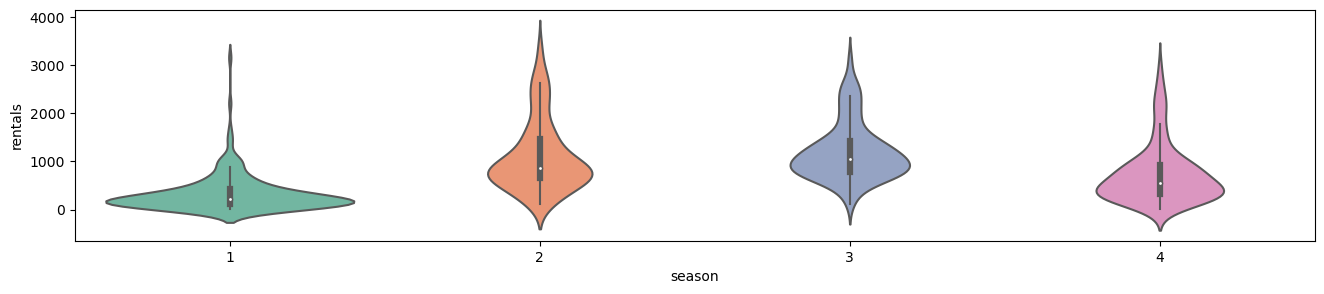

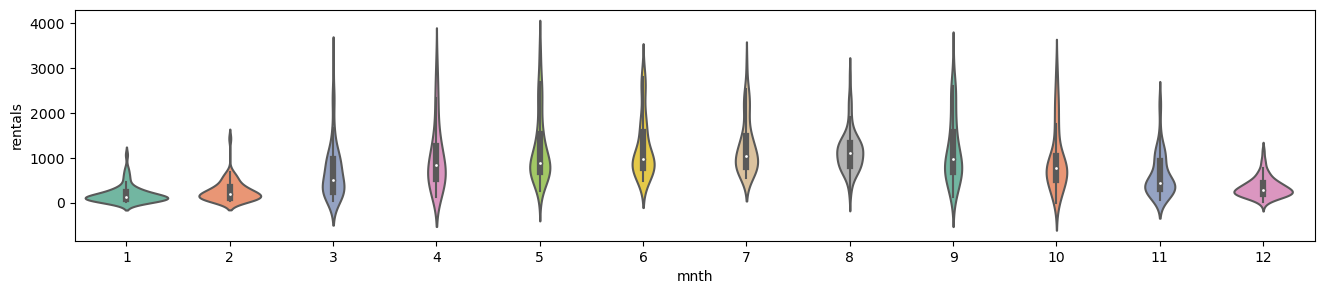

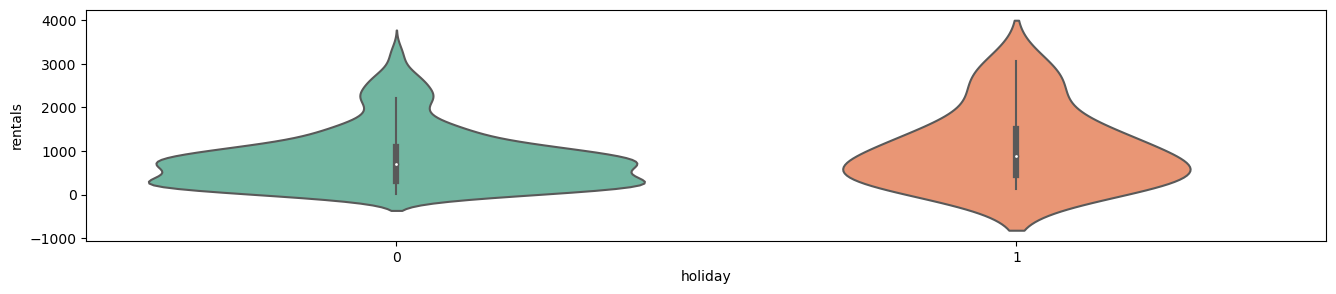

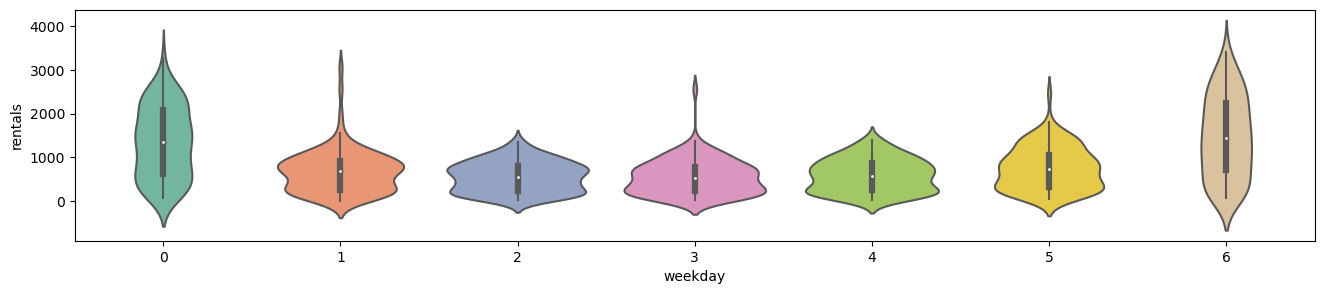

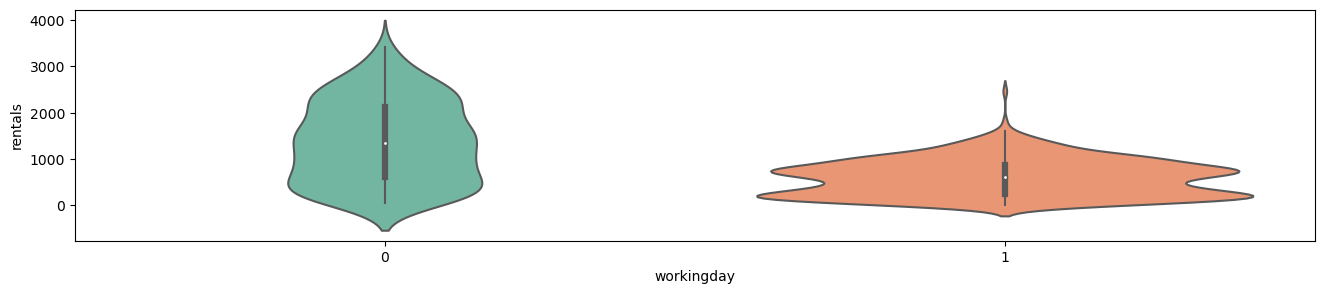

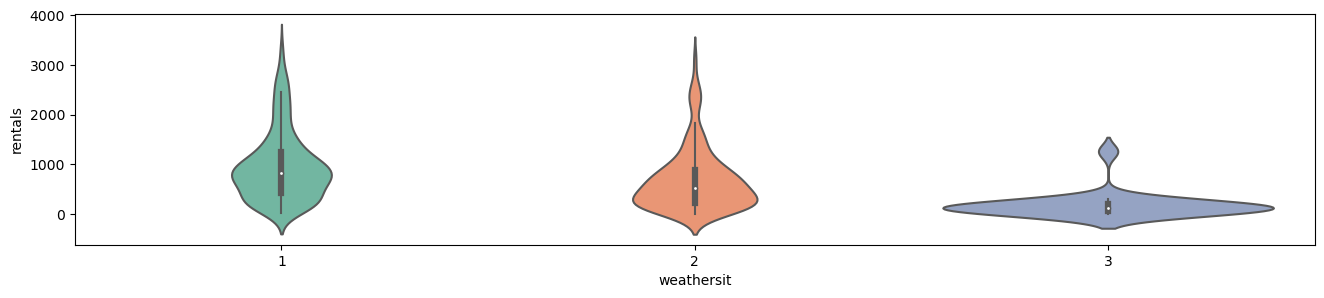

In [95]:
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")
    plt.show()

        count         mean         std    min     25%     50%      75%     max
season                                                                        
1       181.0   334.928177  387.655561    9.0  109.00   218.0   424.00  3155.0
2       184.0  1106.097826  737.590829  120.0  650.25   867.0  1463.25  3410.0
3       188.0  1202.611702  595.975032  118.0  781.75  1050.5  1424.00  3160.0
4       178.0   729.112360  606.318118    2.0  318.50   544.5   922.00  3031.0


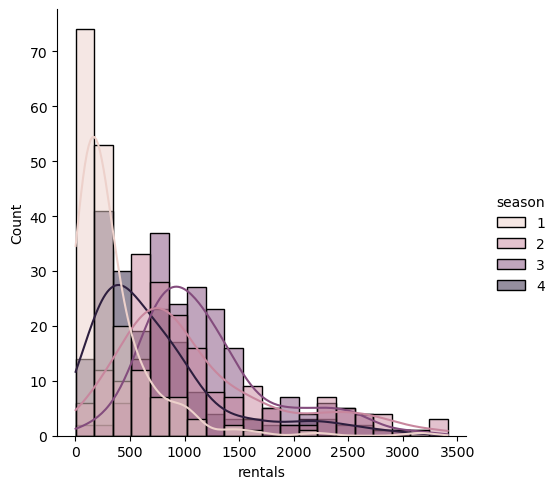

In [96]:
print(bike_data.groupby('season')['rentals'].describe())
sns.displot(data=bike_data,  x=target, hue='season', kde=True)

#### Season

The first set of plots illustrates the seasons (1: winter, 2: spring, 3: summer, 4: autumn), each displaying distinct distributions of bike rentals. During winter, there is a low demand for rentals, with a median of 218 and a mean of approximately 335, confirming the general expected trend of rare bike usage during those months. In spring, the distribution shifts towards higher rental values, with a median of 867 and a mean of 1106. As expected, summer shows the highest mean (1202) and median (1050) values, clearly aligning with anticipated trends. Finally, autumn exhibits a distribution with a median of 544, notably fewer rentals compared to summer. All season distributions are right-skewed, likely due to sunny days or weekends when more people potentially rent bikes.

In [97]:
bike_data.groupby('mnth')['rentals'].describe()

,count,mean,std,min,25%,50%,75%,max
mnth,,,,,,,,
1,62.0,194.225806,197.384490,9.0,82.25,126.5,244.00,1070.0
2,57.0,262.508772,232.283549,47.0,100.00,199.0,349.00,1435.0
3,62.0,716.838710,624.308094,46.0,246.25,508.5,981.75,3155.0
4,60.0,1013.366667,738.345585,120.0,526.25,832.5,1274.00,3252.0
5,62.0,1214.274194,754.950311,255.0,692.50,887.0,1542.00,3410.0
6,60.0,1231.766667,664.017647,477.0,767.50,968.5,1582.00,2963.0
7,62.0,1260.596774,598.382778,562.0,787.75,1045.0,1495.25,3065.0
8,62.0,1161.919355,466.576274,226.0,817.25,1111.0,1335.50,2827.0
9,60.0,1172.050000,738.378375,118.0,676.25,970.0,1576.00,3160.0


#### Months

The distributions of bike rentals clearly coincide with the seasons. The months with the lowest bike rentals are the winter months (December, January, and February). Starting from March, we observe distributions shifting towards higher values, with the highest median reported for August. From this point onwards, the distributions trend towards lower numbers of bike rentals, with the smallest values observed in January.

#### Holidays, weekdays

The following violin plots illustrate the relationship between bike rental and specific days. As expected, holidays exhibit distributions spread towards higher numbers of bikes rented compared to regular days. A similar trend is observed with weekends, where distributions for Saturdays and Sundays show higher median values and greater spread compared to weekdays. Combining weekends with holidays confirms the previous observations, with distributions on non-working days being more spread.

#### Weather category

The final set of violin plots depicts the weather conditions in categorical features, with the first and second groups corresponding to sunnier weather, while the third and fourth represent rainy or snowy days. The distributions of groups 1 and 2 confirm the expected trend of higher bike rentals, whereas group 3 exhibits a distribution concentrated around lower values.